# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()
btc_data

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_data

# Compute current value of my crpto
my_btc_value = my_btc * btc_data['data']['1']['quotes']['USD']['price']
my_eth_value = my_eth*eth_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $24231.60
The current value of your 5.3 ETH is $7867.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    limit = 1000
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


# Preview DataFrame
df_portfolio

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-10-20 04:00:00+00:00  117.70  117.7100  117.5800  117.65   4013620   
2020-10-21 04:00:00+00:00  117.59  117.6400  117.4800  117.51   3688494   
2020-10-22 04:00:00+00:00  117.51  117.5400  117.3000  117.30   4801015   
2020-10-23 04:00:00+00:00  117.33  117.5200  117.3000  117.47   3878745   
2020-10-26 04:00:00+00:00  117.65  117.7200  117.5900  117.63   4962531   
...                           ...       ...       ...     ...       ...   
2022-10-19 04:00:00+00:00   94.41   94.5584   94.1528   94.20   6295299   
2022-10-20 04:00:00+00:00   94.06   94.2555   93.5648   93.63   8860510   
2022-10-21 04:00:00+00:00   93.28   93.8650   93.2000   93.77   8326260   
2022-10-24 04:00:00+00:00   93.77   94.0300   93.4500   93.64   5898426   
2022-10-25 04:00:00+00:00   94.39   94.7050   94.3600   94.56  11361895   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2020-10-20 04:00:00+00:00       16547  117.647903  343.42  346.8800  342.64   
2020-10-21 04:00:00+00:00       13398  117.547939  343.36  348.6847  342.40   
2020-10-22 04:00:00+00:00       12414  117.375645  342.92  345.2400  340.65   
2020-10-23 04:00:00+00:00       13141  117.432446  345.91  345.9900  343.13   
2020-10-26 04:00:00+00:00       16879  117.662790  342.14  342.9800  335.62   
...                               ...         ...     ...       ...     ...   
2022-10-19 04:00:00+00:00       18782   94.314399     NaN       NaN     NaN   
2022-10-20 04:00:00+00:00       19980   93.841305     NaN       NaN     NaN   
2022-10-21 04:00:00+00:00       35796   93.663157     NaN       NaN     NaN   
2022-10-24 04:00:00+00:00       20905   93.735409     NaN       NaN     NaN   
2022-10-25 04:00:00+00:00       35359   94.522662     NaN       NaN     NaN   

                                                                       
                            close      volume trade_count        vwap  
timestamp                                                              
2020-10-20 04:00:00+00:00  343.38  60051880.0    418135.0  344.305601  
2020-10-21 04:00:00+00:00  342.73  63574979.0    410236.0  343.667472  
2020-10-22 04:00:00+00:00  344.61  55399392.0    374620.0  343.409182  
2020-10-23 04:00:00+00:00  345.78  49143931.0    312009.0  344.889310  
2020-10-26 04:00:00+00:00  339.39  91473002.0    554485.0  339.417503  
...                           ...         ...         ...         ...  
2022-10-19 04:00:00+00:00     NaN         NaN         NaN         NaN  
2022-10-20 04:00:00+00:00     NaN         NaN         NaN         NaN  
2022-10-21 04:00:00+00:00     NaN         NaN         NaN         NaN  
2022-10-24 04:00:00+00:00     NaN         NaN         NaN         NaN  
2022-10-25 04:00:00+00:00     NaN         NaN         NaN         NaN  

[508 rows x 14 columns]

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.65
Current SPY closing price: $343.38


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17169.00
The current value of your 200 AGG shares is $23530.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Set the amounts into a dictionary
fin_amount = {"amount":[crypto, shares]}

# set asset categories
assets = ['crypto', 'shares']

# Create savings DataFrame
df_savings = pd.DataFrame(fin_amount, index=assets)


# Display savings DataFrame
display(df_savings)

,amount
crypto,32099.503
shares,40699.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

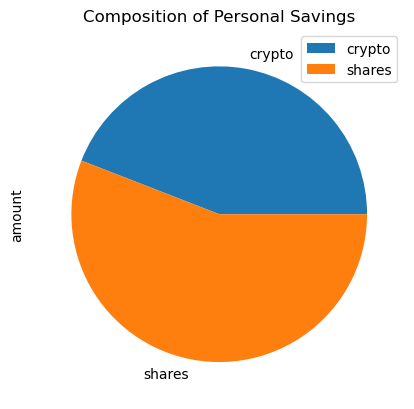

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'][0] + df_savings['amount'][1]

# Validate saving health
if total_savings >emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
    print(f"Emergency: ${emergency_fund:0.2f} | Total Savings: ${total_savings:0.2f}")
elif total_savings == emergency_fund:
    print("Congratulations! You have reach this financial goal.")
else:
    print(f"You are ${emergency_fund- total_savings:0.2f} away from reaching your goal.") 

Congratulations! You have enough money in your emergency fund.
Emergency: $36000.00 | Total Savings: $72798.50


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_port2 = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_port2[df_port2['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_port2[df_port2['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1 , keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Max Work\Desktop\python-homework\Homework5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999370,0.999248,0.999399,1.006568,1.002161,0.997230,0.992945,0.999790,0.992687,1.009536,...,0.995556,0.996948,1.003081,0.997534,0.998586,0.998567,0.996896,1.001576,1.002639,1.004122
2,1.007666,1.002120,1.011027,0.995596,0.999905,1.002245,0.999469,1.008165,0.995277,1.008230,...,0.992177,0.996993,0.997683,0.981913,0.997957,0.998144,1.013285,1.006483,1.006403,1.011293
3,1.003387,1.006457,1.019831,0.996950,0.996414,0.988802,0.997473,1.021833,0.994974,1.008986,...,0.992052,0.997385,1.000612,0.974989,0.993929,0.994286,1.016074,0.995143,1.012045,1.015967
4,1.005013,1.000297,1.031229,0.997010,0.988987,0.986323,0.990802,1.026001,1.002440,1.021533,...,0.998958,1.009483,0.994552,0.984225,0.989133,0.990480,1.009060,1.004666,1.016939,1.017212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.242206,29.808152,11.041798,3.947491,6.653479,18.090574,10.179492,15.098385,5.524229,15.617514,...,52.958324,9.699251,5.691802,11.115654,18.424282,9.874922,13.515279,10.826109,11.790953,40.829792
7557,15.256921,29.844598,11.090742,3.922151,6.672610,18.082243,10.213252,15.133450,5.536838,15.636460,...,52.638183,9.684162,5.655534,11.197768,18.233352,9.972713,13.513852,10.858520,11.793305,41.227728
7558,15.375502,29.878625,11.013458,3.946392,6.706187,18.107196,10.149215,15.257391,5.551832,15.744772,...,52.637414,9.805732,5.680115,11.066128,17.998756,9.946734,13.432487,10.791452,11.737239,41.512582
7559,15.689376,30.170890,10.773627,3.962463,6.701012,17.983054,10.119757,15.384527,5.523106,15.800620,...,52.786936,9.821486,5.678085,11.127508,18.036776,9.893979,13.393062,10.802616,11.723018,41.496272


Text(0.5, 1.0, '500 Simulations of Cumulative Portfolio Return Trajectories over the Next 7560 Trading Days.')

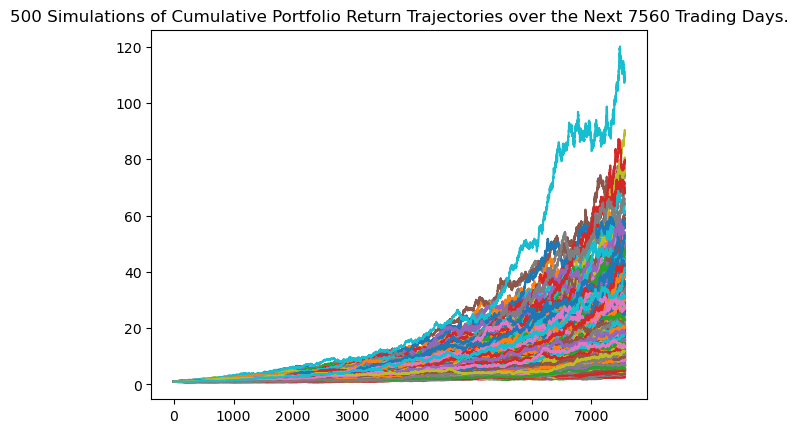

In [19]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()
line_plot.set_title("500 Simulations of Cumulative Portfolio Return Trajectories over the Next 7560 Trading Days.")


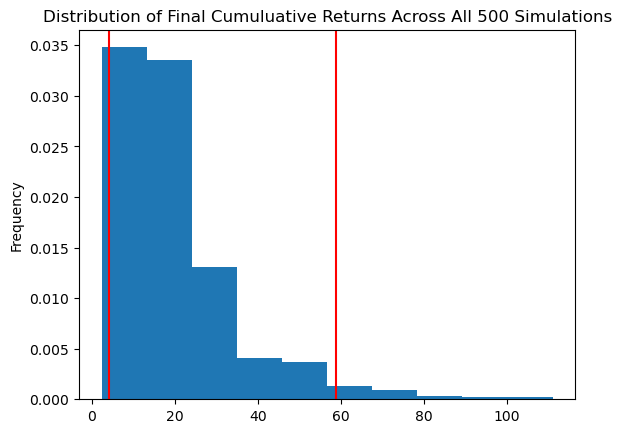

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stat =  MC_30year.summarize_cumulative_return()

# Print summary statistics
print(summary_stat)

count           500.000000
mean             19.851814
std              14.640860
min               2.400726
25%              10.145957
50%              15.936973
75%              24.399912
max             111.037627
95% CI Lower      4.126327
95% CI Upper     58.812358
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,} and ${ci_upper:0,}")


There is a 95% chance that an initial investment of $20000.00 in the portfolio over the next 30 years will end within in the range of $82,526.54 and $1,176,247.16


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stat[8]*initial_investment,2)
ci_upper = round(summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0,} and ${ci_upper:0,}")

There is a 95% chance that an initial investment of $30000.00 in the portfolio over the next 30 years will end within in the range of $123,789.81 and $1,764,370.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Max Work\Desktop\python-homework\Homework5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999371,1.007317,1.000665,1.002326,0.998793,1.015971,0.991619,1.009099,1.005187,0.990236,...,0.999686,1.017153,1.004128,1.002198,1.009992,1.015160,0.999593,0.973337,1.016898,1.003677
2,1.003081,1.007323,1.013120,0.992140,1.012454,1.006975,0.980457,1.014766,0.997234,0.994924,...,0.993622,1.027849,1.000260,1.006477,0.988877,1.019748,1.011679,0.967746,1.009009,0.994747
3,0.988969,1.017016,1.018814,0.992105,1.005610,1.005803,0.984321,1.012850,0.992581,0.986437,...,1.006609,1.033630,1.007153,1.012552,0.985434,1.014716,1.017105,0.969192,1.012424,0.995036
4,1.001034,1.013671,1.006572,0.980410,1.009769,1.017186,0.982941,1.015602,0.986653,0.986443,...,1.008941,1.030453,0.996307,1.014085,0.982500,1.016000,1.018652,0.969481,1.002327,0.998967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.061447,0.768152,1.418578,1.456650,1.538129,1.734642,2.461748,1.425134,2.068077,1.240892,...,1.812078,2.314419,1.069261,2.648547,1.200393,4.811056,2.473346,2.216363,1.788931,2.287894
1257,2.033855,0.768300,1.419712,1.442495,1.536082,1.745370,2.464879,1.435776,2.066293,1.248526,...,1.819745,2.316569,1.081546,2.643807,1.213206,4.810766,2.467400,2.214416,1.780449,2.304470
1258,2.014070,0.759507,1.420546,1.436384,1.529699,1.749758,2.485305,1.439235,2.065124,1.246561,...,1.849079,2.322631,1.089167,2.653861,1.214264,4.829285,2.462376,2.204619,1.778231,2.301675
1259,2.015884,0.763905,1.403882,1.436652,1.525485,1.738666,2.514521,1.462834,2.065424,1.250367,...,1.873391,2.327798,1.079311,2.672709,1.220196,4.866295,2.454871,2.228499,1.780656,2.315420


Text(0.5, 1.0, '500 Simulations of Cumulative Portfolio Return Trajectories over the Next 1260 Trading Days.')

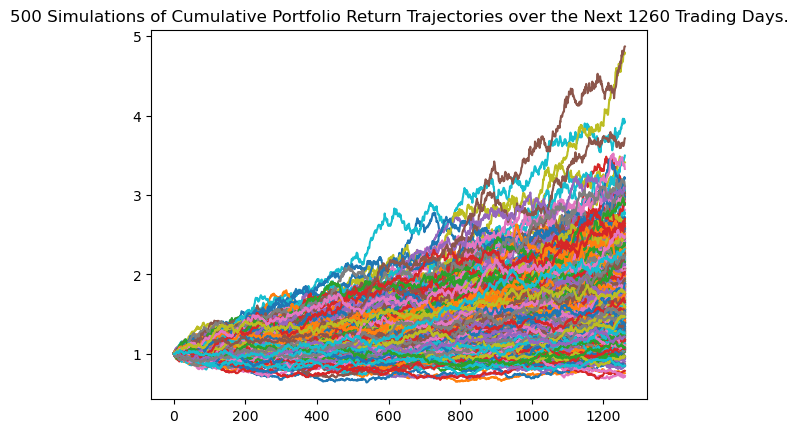

In [26]:
# Plot simulation outcomes
line5_plot = MC_5year.plot_simulation()
line5_plot.set_title("500 Simulations of Cumulative Portfolio Return Trajectories over the Next 1260 Trading Days.")


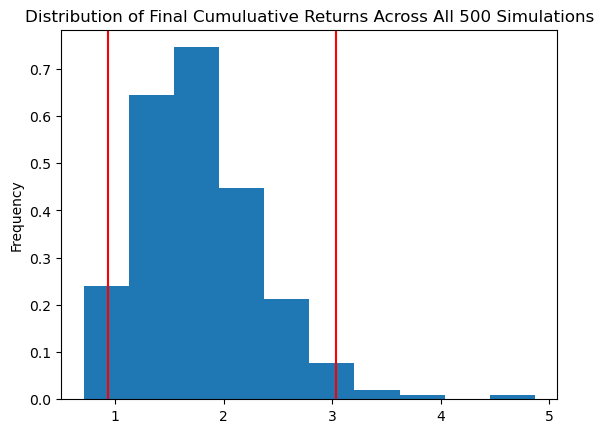

In [27]:
# Plot probability distribution and confidence intervals
dist5_plot = MC_5year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
sum5_stat =  MC_5year.summarize_cumulative_return()

# Print summary statistics
print(sum5_stat)

count           500.000000
mean              1.782235
std               0.565121
min               0.712176
25%               1.390829
50%               1.732970
75%               2.072179
max               4.869173
95% CI Lower      0.932516
95% CI Upper      3.033901
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum5_stat[8]*initial_investment,2)
ci_upper_five = round(sum5_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0,} and ${ci_upper_five:0,}")

There is a 95% chance that an initial investment of $60000.00 in the portfolio over the next 5 years will end within in the range of $55,950.96 and $182,034.04


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Max Work\Desktop\python-homework\Homework5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001508,0.988470,1.010050,0.996028,1.003747,1.010413,1.001746,1.000831,1.007933,1.003258,...,0.996817,0.984202,0.980258,1.013213,0.988979,1.001798,0.990249,1.000179,1.005105,1.001753
2,0.998026,0.989343,1.000806,1.001880,1.009210,0.992212,0.995923,1.003230,1.019843,0.989797,...,1.006766,0.986567,0.990946,1.015124,0.990565,0.993655,0.987777,1.012490,1.008932,1.007250
3,0.998044,0.978465,1.005390,0.998730,0.999345,0.998544,1.000118,1.009182,1.026943,0.988948,...,1.011465,1.006229,0.977989,1.009661,0.981417,0.995838,0.995929,1.008339,1.009720,0.994886
4,1.004829,0.981137,1.004563,0.994565,1.008834,0.992215,0.989660,1.008925,1.031424,0.971697,...,1.015625,0.999175,0.965349,1.010075,0.980849,0.996208,0.989640,1.002926,1.013035,0.994711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.346795,1.466550,5.173306,2.324507,3.880323,2.975189,2.151801,0.720700,2.430392,2.399960,...,10.437126,2.137495,2.774531,2.613849,2.858155,1.632646,1.216943,2.225938,4.081052,1.818214
2517,2.321109,1.456726,5.193040,2.368660,3.881221,2.990361,2.143572,0.723325,2.430204,2.381383,...,10.361247,2.146533,2.780884,2.588844,2.814616,1.659647,1.218750,2.226028,4.067445,1.798898
2518,2.319225,1.460318,5.124798,2.348223,3.888818,2.994452,2.142267,0.712345,2.417955,2.373953,...,10.341302,2.136107,2.765158,2.616959,2.803009,1.691986,1.218752,2.238616,4.054632,1.769490
2519,2.312479,1.471642,5.129330,2.334849,3.853448,2.973578,2.150470,0.701491,2.437772,2.345924,...,10.306927,2.145576,2.794150,2.635688,2.845792,1.666002,1.224224,2.231065,4.075782,1.764041


Text(0.5, 1.0, '500 Simulations of Cumulative Portfolio Return Trajectories over the Next 2520 Trading Days.')

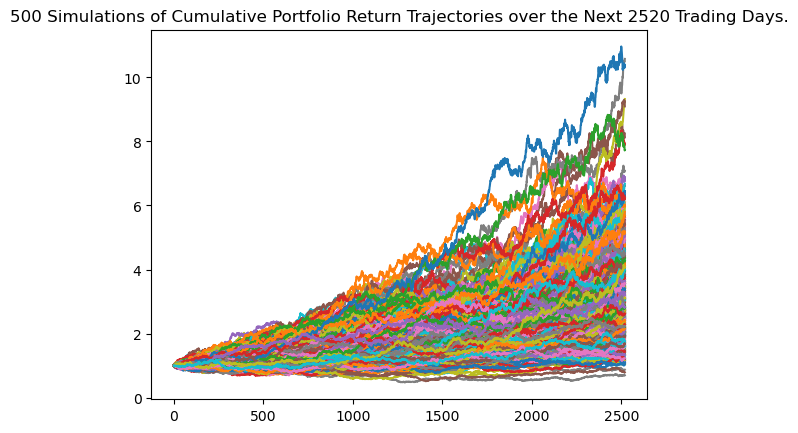

In [32]:
# Plot simulation outcomes
line10_plot = MC_10year.plot_simulation()
line10_plot.set_title("500 Simulations of Cumulative Portfolio Return Trajectories over the Next 2520 Trading Days.")


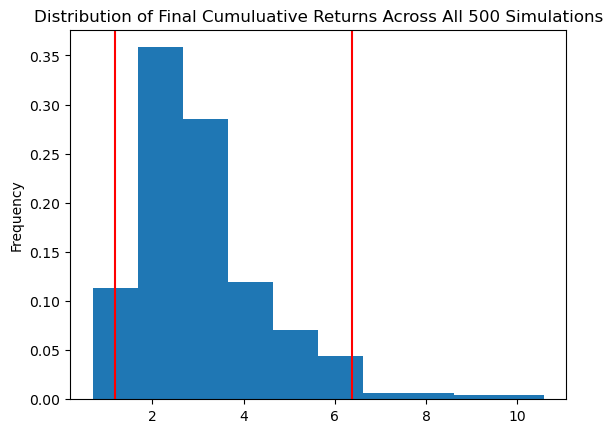

In [33]:
# Plot probability distribution and confidence intervals
dist10_plot = MC_10year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
sum10_stat =  MC_10year.summarize_cumulative_return()

# Print summary statistics
print(sum10_stat)

count           500.000000
mean              3.099318
std               1.434362
min               0.696270
25%               2.132762
50%               2.740368
75%               3.667734
max              10.577643
95% CI Lower      1.193172
95% CI Upper      6.383345
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum10_stat[8]*initial_investment,2)
ci_upper_ten = round(sum10_stat[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0,} and ${ci_upper_ten:0,}")

There is a 95% chance that an initial investment of $60000.00 in the portfolio over the next 10 years will end within in the range of $71,590.34 and $383,000.71
